In [1]:
from dsc80_utils import *

# Lecture 7 – Missingness Mechanisms

## DSC 80, Summer 2025

### Announcements 📣

- Lab 4 will be released today and is due on **Thursday, August 14**.
- Project 1 is due **Saturday, August 16**.
- Keep up the solid work! :)

### Agenda 📆

- Missingness mechanisms.
    - Why do data go missing?
    - Missing by Design.
    - Not Missing at Random.
    - Missing Completely at Random.
    - Missing at Random.
- Formal definitions.
- Identifying missingness mechanisms in data.

### Additional resources

These recent lectures have been quite conceptual! Here are a few other places to look for readings; many of these are linked on the course homepage and on the [Resources](https://dsc80.com/resources) tab of the course website.

- Permutation testing:
    - Extra lecture notebook: [Fast Permutation Tests](https://dsc80.com/resources/lectures/lec07/lec07-fast-permutation-tests.html).
    - [Great visualization](https://www.jwilber.me/permutationtest/).
- Missingness mechanisms:
    - [(Old) Course notes](https://notes.dsc80.com/content/06/defining-missing.html).
    - [Wikipedia](https://en.wikipedia.org/wiki/Missing_data).
    - [This textbook page](https://stefvanbuuren.name/fimd/sec-MCAR.html).
    - [This journal article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4121561/).

<div class="alert alert-warning">
    <h3>Breakout 🤔 </h3>
</div>

_Taken from the Summer 2022 DSC 10 Final Exam._
    
Every year, the American Kennel Club holds a Photo Contest for dogs. Eric wants to know whether **toy dogs win disproportionately more often than other kinds of dogs**. He has collected a sample of 500 dogs that have won the Photo Contest. In his sample, 200 dogs were toy dogs.

Eric also knows the distribution of dog kinds in the population:

<center><img src="imgs/q6_df.png" width="50%"></center>

Suppose he has the following null and alternative hypotheses:
- **Null Hypothesis**: The proportion of toy dogs that win is 0.3.
- **Alternative Hypothesis**: The proportion of toy dogs that win is greater than 0.3.

**Select all the test statistics that Eric can use to conduct his hypothesis.**

- A. The proportion of toy dogs in his sample.
- B. The number of toy dogs in his sample.
- C. The absolute difference of the sample proportion of toy dogs and 0.3.
- D. The absolute difference of the sample proportion of toy dogs and 0.5.
- E. The TVD between his sample and the population.

## Missingness mechanisms

### Imperfect data

<center><img src="imgs/image_0.png" width=40%></center>

- When studying a problem, we are interested in understanding the **true model** in nature.
- The data generating process is the "real-world" version of the model, that generates the data that we observe.
- The recorded data is **supposed** to "well-represent" the data generating process, and subsequently the true model.

- Example: Consider the upcoming Midterm Exam (on August 18th, in lecture).
    - The exam is meant to be a **model** of your **true** knowledge of DSC 80 concepts.
    - The data generating process should give us a sense of your true knowledge, but is influenced by the specific questions on the exam, your preparation for the exam, whether or not you are sick on the day of the exam, etc.
    - The recorded data consists of the final answers you write on the exam page.

### Imperfect data

<center><img src="imgs/image_0.png" width=40%></center>

* **Problem 1**: Your data is not representative, i.e. you have a poor access frame and/or collected a poor sample.
    - If the exam only asked questions about `pivot_table`, that would not give us an accurate picture of your understanding of DSC 80!

* **Problem 2**: Some of the entries are missing.
    - If you left some questions blank, why?

We will focus on the second problem.

### Types of missingness

There are four key ways in which values can be missing. It is important to distinguish between these types since in some cases, we can **impute** (fill in) the missing data.

* **Missing by design (MD)**.
* **Not missing at random (NMAR)**.
    - Also called "non-ignorable" (NI).
* **Missing at random (MAR)**.
* **Missing completely at random (MCAR)**.

### Missing by design (MD)

- Values in a column are missing by design if:
    - the designers of the data collection process **intentionally decided to not collect data in that column**,
    - because it can be recovered from other columns. 

- If you can determine whether a value is missing solely using other columns, then the data is missing by design.
    - For example: `'Age4'` is missing if and only if `'Number of People'` is less than 4.
<center><img src=imgs/households.png width=50%></center>

- Refer to [this StackExchange link](https://stats.stackexchange.com/questions/201782/meaning-of-missing-by-design-in-longitudinal-studies) for more examples.

### Missing by design


<center><img src="./imgs/Skiplogic.png"/ width=60%></center>

**Example**: `'Car Type?'` and `'Car Colour?'` are missing if and only if `'Own a car?'` is `'No'`.


### Other types of missingness

- Not missing at random (NMAR).
    - The chance that a value is missing **depends on the actual missing value**!

- Missing completely at random (MCAR).
    - The chance that a value is missing is **completely independent** of
        - other columns, and
        - the actual missing value.

- Missing at random (MAR).
    - The chance that a value is missing **depends on other columns**, but **not** the actual missing value itself.
    - If a column is MAR, then it is MCAR **when conditioned on some set of other columns**.

### Mom... the dog ate my data! 🐶

Consider the following (contrived) example:

- We survey 100 people for their favorite color and birth month.
- We write their answers on index cards.
    - On the left side, we write <span style='color:red'>c</span><span style='color:orange'>o</span><span style='color:yellow'>l</span><span style='color:green'>o</span><span style='color:blue'>r</span><span style='color:purple'>s</span>.
    - On the right side, we write birth months 📆.
- A bad dog takes the top 10 cards from the stack and chews off the right side (birth months).
- Now ten people are missing birth months!

<center><img src="imgs/dog.png" width=50%></center>

<div class="alert alert-success" markdown="1">
    <h3>Exercise</h3>
    
We are now missing birth months for the first 10 people we surveyed. What is the missingness mechanism for birth months if:

1. Cards were sorted by favorite color?
2. Cards were sorted by birth month?
3. Cards were shuffled?

Remember:

- **Not missing at random (NMAR)**: The chance that a value is missing **depends on the actual missing value**!
- **Missing at random (MAR)**: The chance that a value is missing **depends on other columns**, but **not** the actual missing value itself.
- **Missing completely at random (MCAR)**: The chance that a value is missing is **completely independent** of other columns and the actual missing value.

</div>

### Exercised, solved

- If cards were sorted by favorite color, then:
    - The fact that a card is missing a month is **related to the favorite color**.
    - Since the missingness depends on another column, we say values are **missing at random (MAR)**.
        - The missingness doesn't depend on the actual missing values – if we fix a particular color, early months are no more likely to be missing than later months.

- If cards were sorted by birth month, then:
    - The fact that a card is missing a month is **related to the missing month**.
    - Since the missingness depends on the actual missing values – early months are more likely to be missing than later months – we say values are **not missing at random (NMAR)**.

- If cards were shuffled, then:
    - The fact that a card is missing a month is **related to nothing**.
    - Since the missingness depends on nothing, we say values are **missing completely at random (MCAR)**.

### The real world is messy! 🌎

- In our contrived example, the distinction between NMAR, MAR, and MCAR was relatively clear.
- However, in more practical examples, it can be hard to distinguish between types of missingness.
- Domain knowledge is often needed to understand **why** values might be missing.

### Not missing at random (NMAR)

- Data is NMAR if the chance that a value is missing **depends on the actual missing value**!
    - It could _also_ depend on other columns.

- Another term for NMAR is "non-ignorable" – the fact that data is missing is data in and of itself that we cannot ignore.

- **Example**: A person doesn't take a drug test because they took drugs the day before.

- **Example**: On an employment survey, people with really high incomes may be less likely to report their income.
    - If we **ignore** missingness and compute the mean salary, our result will be **biased** low!

- When data is NMAR, we must reason about why the data is missing using domain expertise on the data generating process – the other columns in our data won't help. 

### Missing completely at random (MCAR)

- Data is MCAR if the chance that a value is missing is **completely independent** of other columns and the actual missing value.

- **Example**: After the Midterm Exam, I accidentally spill boba on the top of the stack. Assuming that the exams are in a random order, the exam scores that are lost due to this still will be MCAR. (Hopefully this doesn't happen!)

<center><img src="imgs/tea.jpg" width="20%"></center>

### Missing at random (MAR)

- Data is MAR if the chance that a value is missing **depends on other columns**, but **not** the actual missing value itself.

- **Example**: People who work in the service industry may be less likely to report their income.
    - If you look at service industry workers only, there is no pattern to the missingness of income (MCAR).
    - If you look at corporate workers only, there is no pattern to the missingness of income (MCAR).
    - Within each industry, missingness is MCAR, but overall, it is MAR, since the **missingness of income depends on industry**.


* **Example**: An elementary school teacher keeps track of the health conditions of each student in their class. One day, a student doesn't show up for a test because they are at the hospital.
    - The fact that their test score is missing has nothing to do with the test score itself.
    - But the teacher could have predicted that the score would have been missing given the other information they had about the student.

### Isn't everything NMAR? 🤔

- You can argue that many of these examples are NMAR, by arguing that the missingness depends on the value of the data that is missing.
    - For example, if a student is hospitalized, they may have lots of health problems and may not have spent much time on school, leading to their test scores being worse.

- Fair point, but with that logic _almost everything is NMAR_. What we really care about is **the main reason data is missing**.

- If the other columns **mostly** explain the missing value and missingness, treat it as MAR.

- **In other words, accounting for potential confounding variables makes NMAR data more like MAR.**
    - This is a big part of experimental design.

### Flowchart

A good strategy is to assess missingness in the following order.

<center><b>Missing by design (MD)</b></center>
<center><i>Can I determine the missing value exactly by looking at the other columns?</i> 🤔</center>
<center> ⬇️ </center>

<center><b>Not missing at random (NMAR)</b></center>
<center><i>Is there a good reason why the missingness depends on the values themselves?</i> 🤔</center>
<center> ⬇️ </center>

<center><b>Missing at random (MAR)</b></center>
<center><i>Do other columns tell me anything about the likelihood that a value is missing? </i>🤔</center>
<center> ⬇️ </center>

<center><b>Missing completely at random (MCAR)</b></center>
<center><i>The missingness must not depend on other columns or the values themselves. </i>😄</center>

<div class="alert alert-success" markdown="1">
    <h3>Exercise</h3>

In each of the following examples, decide whether the missing data are likely to be MD, NMAR, MAR, or MCAR:

* A table for a medical study has columns for `'gender'` and `'age'`. **`'age'` has missing values**.
* Measurements from the Hubble Space Telescope are **dropped during transmission**.
* A table has a single column, `'self-reported education level'`, **which contains missing values**.
* A table of grades contains three columns, `'Version 1'`, `'Version 2'`, and `'Version 3'`. **$\frac{2}{3}$ of the entries in the table are `NaN`.**

</div>

### Why do we care again?

- If a dataset contains missing values, it is likely not an accurate picture of the data generating process.
- By identifying missingness mechanisms, we can best **fill in** missing values, to gain a better understanding of the DGP.

<div class="alert alert-warning">
    <h3>Chalk Talk🤔 </h3>
</div>


## Formal definitions

We won't spend much time on these in lecture, but you may find them helpful.

### Formal definition: MCAR

Suppose we have:
- A dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- A parameter $\psi$ that represents all relevant information that is not part of the dataset.

Data is **missing completely at random** (MCAR) if 

$$\text{P}(\text{data is present} \: | \: Y_{obs}, Y_{mis}, \psi) = \text{P}(\text{data is present} \: | \: \psi)$$

That is, adding information about the dataset doesn't change the likelihood data is missing!

### Formal definition: MAR

Suppose we have:
- A dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- A parameter $\psi$ that represents all relevant information that is not part of the dataset.

Data is **missing at random** (MCAR) if 

$$\text{P}(\text{data is present} \: | \: Y_{obs}, Y_{mis}, \psi) = \text{P}(\text{data is present} \: | \: Y_{obs},  \psi)$$

That is, MAR data is **actually MCAR**, **conditional** on $Y_{obs}$.

### Formal definition: NMAR

Suppose we have:
- A dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- A parameter $\psi$ that represents all relevant information that is not part of the dataset.


Data is **not missing at random** (NMAR) if  

$$\text{P}(\text{data is present} \: | \: Y_{obs}, Y_{mis}, \psi)$$

cannot be simplified. That is, in NMAR data, **missingness is dependent on the missing value** itself.

## Identifying missingness mechanisms in data

### Identifying missingness mechanisms in data

- Suppose I believe that the missingness mechanism of a column is NMAR, MAR, or MCAR.
    - I've ruled out missing by design (a good first step).
- Can I check whether this is true, by looking at the data?

### Assessing NMAR

- We can't determine if data is NMAR just by looking at the data, as whether or not data is NMAR depends on the **unobserved data**.

- To establish if data is NMAR, we must:
    - **reason about the data generating process**, or
    - collect more data.

- **Example**: Consider a dataset of survey data of students' self-reported happiness. The data contains PIDs and happiness scores; nothing else. Some happiness scores are missing. **Are happiness scores likely NMAR?**

### Assessing MAR

- Data are MAR if the missingness only depends on **observed** data.

- After reasoning about the data generating process, if you establish that data is not NMAR, then it must be either MAR or MCAR.

- The more columns we have in our dataset, the "weaker the NMAR effect" is.
    - Adding more columns -> controlling for more variables -> moving from NMAR to MAR.
    - **Example**: With no other columns, income in a census is NMAR. But once we look at location, education, and occupation, incomes are closer to being MAR.

### Deciding between MCAR and MAR

- For data to be MCAR, the chance that values are missing should not depend on any other column or the values themselves.

- **Example**: Consider a dataset of phones, in which we store the screen size and price of each phone. **Some prices are missing.**

| Phone | Screen Size | Price |
| --- | --- | --- |
| iPhone 15 | 6.06 | 999 |
| Galaxy Z Fold5 | 7.6 | NaN |
| OnePlus 12R | 6.7 | 499 |
| iPhone 14 Pro Max | 6.68 | NaN |

- If prices are MCAR, then **the distribution of screen size should be the same** for:
    - phones whose prices are missing, and 
    - phones whose prices aren't missing.

- **We can use a permutation test to decide between MAR and MCAR!** We are asking the question, did these two samples come from the same underlying distribution?

### Deciding between MCAR and MAR

Suppose you have a DataFrame with columns named $\text{col}_1$, $\text{col}_2$, ..., $\text{col}_k$, and want to test whether values in $\text{col}_X$ are MCAR. To test whether $\text{col}_X$'s missingness is independent of all other columns in the DataFrame:

For $i = 1, 2, ..., k$, where $i \neq X$:

- Look at the distribution of $\text{col}_i$ when $\text{col}_X$ is missing.

- Look at the distribution of $\text{col}_i$ when $\text{col}_X$ is not missing.

- Check if these two distributions are the same. (What do we mean by "the same"?)

- If so, then $\text{col}_X$'s missingness doesn't depend on $\text{col}_i$.

- If not, then $\text{col}_X$ is MAR dependent on $\text{col}_i$.

If all pairs of distributions were the same, then $\text{col}_X$ is MCAR.

### Example: Heights

- Let's load in Galton's dataset containing the heights of adult children and their parents (which you may have seen in DSC 10).
- The dataset does not contain any missing values – we will **artifically introduce missing values** such that the values are MCAR, for illustration.

In [2]:
heights_path = Path('data') / 'midparent.csv'
heights = pd.read_csv(heights_path).rename(columns={'childHeight': 'child'})[['father', 'mother', 'gender', 'child']]
heights.head()

,father,mother,gender,child
0,78.5,67.0,male,73.2
1,78.5,67.0,female,69.2
2,78.5,67.0,female,69.0
3,78.5,67.0,female,69.0
4,75.5,66.5,male,73.5


Proof that there aren't currently any missing values in `heights`:

In [3]:
heights.isna().sum()

father    0
mother    0
gender    0
child     0
dtype: int64

We have three numerical columns – `'father'`, `'mother'`, and `'child'`. Let's visualize them simultaneously.

In [4]:
# Needed to add renderer
import plotly.io as pio

# Notebook 7 (new Jupyter) – best bet:
pio.renderers.default = "plotly_mimetype"


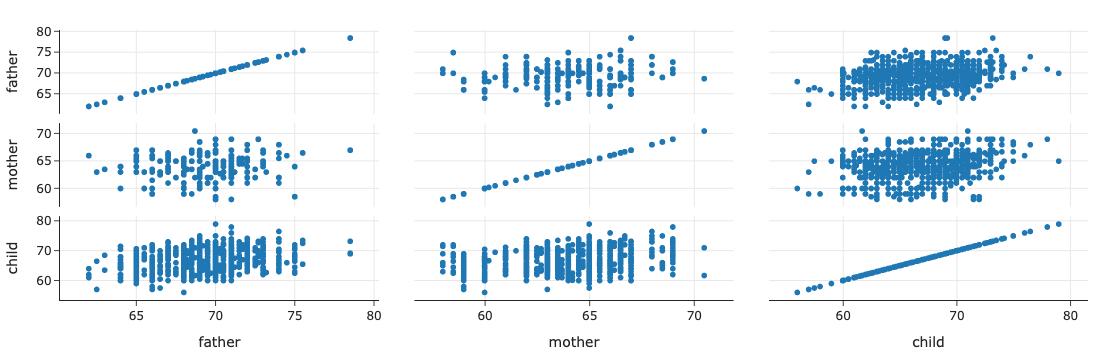

In [5]:
fig = px.scatter_matrix(heights.drop(columns=['gender']))
fig

### Simulating MCAR data

- We will make `'child'` MCAR by taking a random subset of `heights` and setting the corresponding `'child'` heights to `np.NaN`.
- This is equivalent to flipping a (biased) coin for each row. 
    - If heads, we delete the `'child'` height.
- **You will not do this in practice!**

In [6]:
np.random.seed(42) # So that we get the same results each time (for lecture).

heights_mcar = heights.copy()
idx = heights_mcar.sample(frac=0.3).index
heights_mcar.loc[idx, 'child'] = np.nan

In [23]:
heights_mcar.head(10)

,father,mother,gender,child
0,78.5,67.0,male,73.2
1,78.5,67.0,female,69.2
2,78.5,67.0,female,NaN
...,...,...,...,...
7,75.5,66.5,female,NaN
8,75.0,64.0,male,71.0
9,75.0,64.0,female,68.0


In [7]:
heights_mcar.isna().mean()

father    0.0
mother    0.0
gender    0.0
child     0.3
dtype: float64

### Verifying that child heights are MCAR in `heights_mcar`

- Each row of `heights_mcar` belongs to one of two **groups**:
    - Group 1: `'child'` is missing.
    - Group 2: `'child'` is not missing.

In [8]:
heights_mcar['child_missing'] = heights_mcar['child'].isna()
heights_mcar.head()

,father,mother,gender,child,child_missing
0,78.5,67.0,male,73.2,False
1,78.5,67.0,female,69.2,False
2,78.5,67.0,female,NaN,True
3,78.5,67.0,female,69.0,False
4,75.5,66.5,male,73.5,False


- We need to look at the distributions of every other column – `'gender'`, `'mother'`, and `'father'` – separately for these two groups, and check to see if they are similar.

### Comparing null and non-null `'child'` distributions for `'gender'`

In [9]:
gender_dist = (
    heights_mcar
    .assign(child_missing=heights_mcar['child'].isna())
    .pivot_table(index='gender', columns='child_missing', aggfunc='size')
)

# Added just to make the resulting pivot table easier to read.
gender_dist.columns = ['child_missing = False', 'child_missing = True']

gender_dist = gender_dist / gender_dist.sum()
gender_dist

,child_missing = False,child_missing = True
gender,,
female,0.49,0.48
male,0.51,0.52


- Note that here, each column is a separate distribution that adds to 1.

- The two columns look similar, which is evidence that `'child'`'s missingness does not depend on `'gender'`.
    - Knowing that the child is `'female'` doesn't make it any more or less likely that their height is missing than knowing if the child is `'male'`.

### Comparing null and non-null `'child'` distributions for `'gender'`

- In the previous slide, we saw that the distribution of `'gender'` is similar whether or not `'child'` is missing.

- To make precise what we mean by "similar", we can run a permutation test. We are comparing two distributions:
    1. The distribution of `'gender'` when `'child'` is missing.
    2. The distribution of `'gender'` when `'child'` is not missing.

- What test statistic do we use to compare categorical distributions?

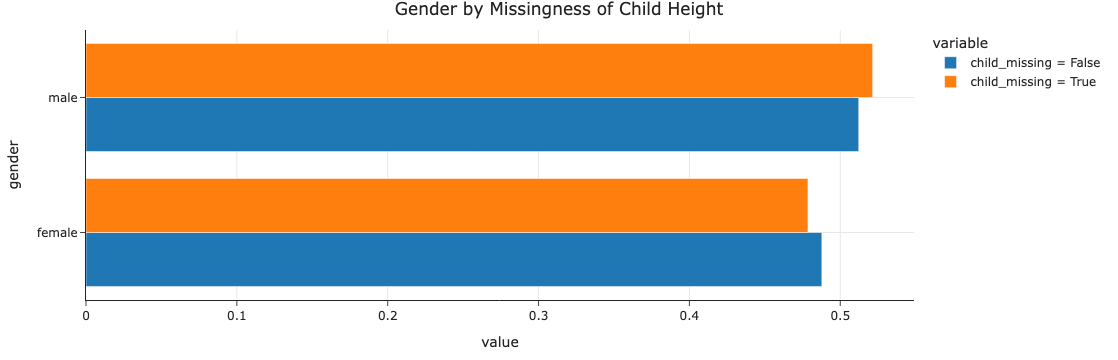

In [11]:
gender_dist.plot(kind='barh', title='Gender by Missingness of Child Height', barmode='group')

To measure the "distance" between two categorical distributions, we use the **total variation distance**.

Note that  with only two categories, the TVD is the same as the absolute difference in proportions for either category.

### Simulation

The code to run our simulation largely looks the same as in previous permutation tests. Remember, we are comparing two distributions:
- The distribution of 'gender' when 'child' is missing.
- The distribution of 'gender' when 'child' is not missing.

In [12]:
n_repetitions = 1000
shuffled = heights_mcar.copy()

tvds = []
for _ in range(n_repetitions):
    
    # Shuffling genders. 
    # Note that we are assigning back to the same DataFrame for performance reasons; 
    # see https://dsc80.com/resources/lectures/lec07/lec07-fast-permutation-tests.html.
    shuffled['gender'] = np.random.permutation(shuffled['gender'])
    
    # Computing and storing the TVD.
    pivoted = (
        shuffled
        .pivot_table(index='gender', columns='child_missing', aggfunc='size')
    )
    
    pivoted = pivoted / pivoted.sum()
    
    tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)

In [13]:
observed_tvd = gender_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
observed_tvd

np.float64(0.009196155526430771)

### Results

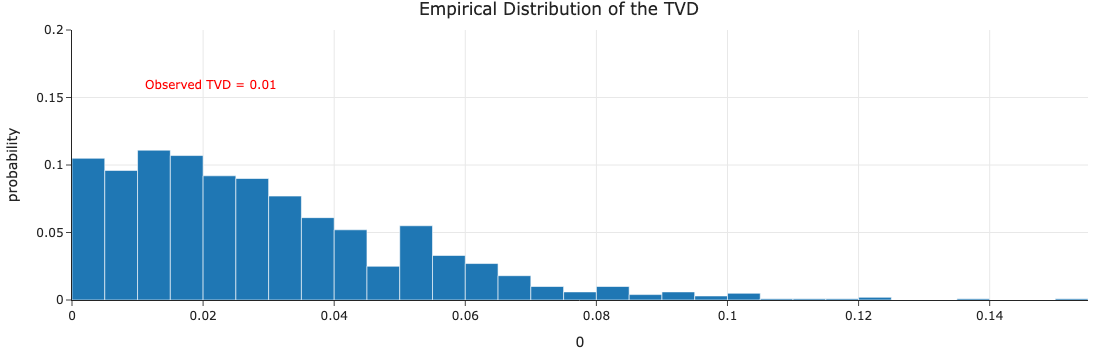

In [14]:
fig = px.histogram(pd.DataFrame(tvds), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig.add_vline(x=observed_tvd, line_color='red')
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed_tvd, 2)}</span>',
                   x=2.3 * observed_tvd, showarrow=False, y=0.16)
fig.update_layout(yaxis_range=[0, 0.2])

In [15]:
(np.array(tvds) >= observed_tvd).mean()

np.float64(0.835)

- We fail to reject the null.
- Recall, the null stated that the distribution of `'gender'` when `'child'` is missing is the same as the distribution of `'gender'` when `'child'` is not missing.
- Hence, we conclude that the missingness in the `'child'` column is not dependent on `'gender'`.

### Comparing null and non-null `'child'` distributions for `'father'`

- We again must compare two distributions:
    1. The distribution of `'father'` when `'child'` is missing.
    2. The distribution of `'father'` when `'child'` is not missing.

- If the distributions are similar, we conclude that the missingness of `'child'` is not dependent on the height of the `'father'`.

- We can again use a permutation test.

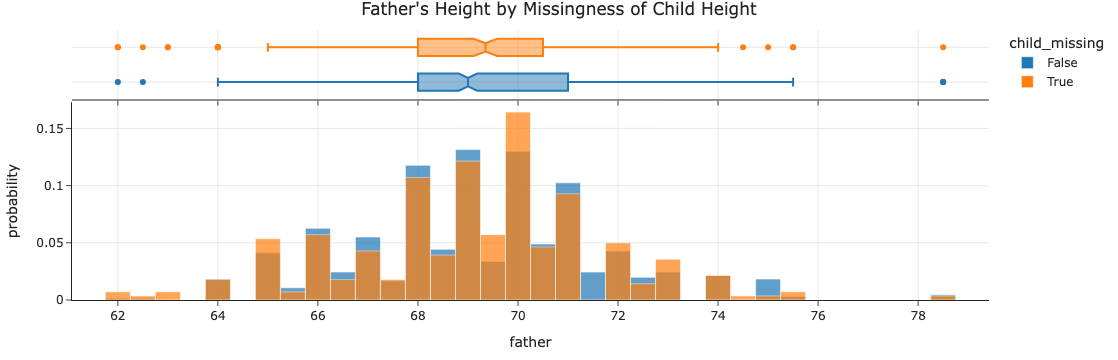

In [16]:
px.histogram(heights_mcar, x='father', color='child_missing', histnorm='probability', marginal='box',
             title="Father's Height by Missingness of Child Height", barmode='overlay', opacity=0.7)

We can visualize numerical distributions with histograms, or with **kernel density estimates**. (See the definition of `create_kde_plotly` at the top of the notebook if you're curious as to how these are created.)

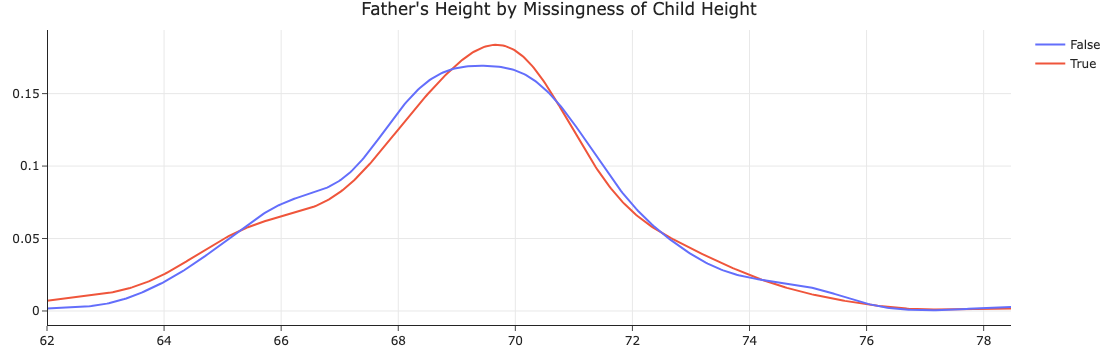

In [21]:
create_kde_plotly(heights_mcar, 'child_missing', True, False, 'father', 
                  "Father's Height by Missingness of Child Height")

### Concluding that `'child'` is MCAR

- We need to run three permutation tests – one for each column in `heights_mcar` other than `'child'`.

- For every other column, if we **fail to reject the null** that the distribution of the column when `'child'` is missing is the same as the distribution of the column when `'child'` is not missing, then we can conclude `'child'` is MCAR.
    - In such a case, its missingness is not tied to any other columns.
    - For instance, children with shorter fathers are not any more likely to have missing heights than children with taller fathers.

## Summary, next time

### Summary

- Refer to the [Flowchart](#Flowchart) for an overview of the four missingness mechanisms.
- We can use permutation tests to verify if a column is MAR vs. MCAR.
    - Create two groups: one where values in a column are missing, and another where values in a column aren't missing.
    - To test the missingness of column X:
        - For every other column, test the null hypothesis "the distribution of (other column) is the same when column X is missing and when column X is not missing."
        - If you fail to reject the null, then column X's missingness does not depend on (other column).
        - If you reject the null, then column X is MAR dependent on (other column).
        - If you fail to reject the null for all other columns, then column X is MCAR!

### Next time

- More examples of deciding between MCAR and MAR using permutation tests.
    - For instance, we'll simulate MAR data and see if we can detect whether it is MAR.
    - We'll also learn about a new test statistic for measuring the similarity between two categorical distributions.
- Imputation: given that we know a column's missingness mechanism, how do we fill in its missing values?